In [76]:
# I) Importiong Libraries

pip install plotly

In [77]:
import pandas
import matplotlib.pyplot as plt
import plotly.graph_objs as go

In [78]:
# II) Functions
# 1. The `is_valid` function checks if a row of data is valid based on different conditions.
# It verifies if the 'action' matches certain values and then examines other columns like 'is_form_edit',
# 'field_name', 'field_value', 'page_number', and 'is_successful' to ensure they meet specific criteria,
# such as being true or not being NaN, depending on the action type. If all conditions are met, it returns True; otherwise, it returns False.

def is_valid(row):
    if row['action'] == 'enter_submit':
        return row['is_form_edit'] == True or row['is_form_edit'] == False
    elif row['action'] == 'validation_error':
        return pandas.notna(row['field_name']) or pandas.notna(row['field_value'])
    elif row['action'] == 'submit_next_page':
        return row['page_number'] == 1 or row['page_number'] == 2
    elif row['action'] == 'submit_prev_page':
        return row['page_number'] == 1 or row['page_number'] == 2 or row['page_number'] == 3
    elif row['action'] == 'exit_submit':
        return (row['page_number'] == 1 or row['page_number'] == 2 or row['page_number'] == 3) and (row['is_successful'] == True or row['is_successful'] == False)
    else:
        return False

In [79]:
# III) Importing CSV file

df = pandas.read_csv('/content/submit_actions.csv')

<ipython-input-79-4bc64a70a94c>:3: DtypeWarning:

Columns (4,5,7,8) have mixed types. Specify dtype option on import or set low_memory=False.



In [80]:
display(df)

,Unnamed: 0,action,device_id,created_at,field_name,field_value,page_number,is_form_edit,is_successful
0,0,submit_next_page,7X7WsWrMRaeTSmHwGkc5XA,1561442346418,NaN,NaN,2.0,NaN,NaN
1,1,submit_next_page,p8Aem44zRlKbu7NcmrkQaQ,1561442395784,NaN,NaN,2.0,NaN,NaN
2,2,submit_next_page,c9e8UhaWSi2Kf-NWE2KaRA,1561442383946,NaN,NaN,1.0,NaN,NaN
3,3,submit_next_page,c9e8UhaWSi2Kf-NWE2KaRA,1561442396632,NaN,NaN,2.0,NaN,NaN
4,4,submit_next_page,CwEk-rdHSKSd0jlTPMiG4Q,1561442389640,NaN,NaN,2.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1074801,1074801,validation_error,-2U7xS9kTsKSzXRmu56A4g,1561423228941,title,NaN,NaN,NaN,NaN
1074802,1074802,validation_error,-2U7xS9kTsKSzXRmu56A4g,1561423228955,description,NaN,NaN,NaN,NaN
1074803,1074803,validation_error,gajH5XGBTCe5e7s7Q9c06A,1561421067461,title,۱۷۰۰متر باغ در بهترین منطقه شهریار باغستان نزد...,NaN,NaN,NaN
1074804,1074804,validation_error,gajH5XGBTCe5e7s7Q9c06A,1561421069265,title,۱۷۰۰متر باغ در بهترین منطقه شهریار باغستان نزد...,NaN,NaN,NaN


In [81]:
# IV) Cleaning Data

# Applying 'is_valid' function on dataframe

valid_mask = df.apply(is_valid, axis=1)

In [82]:
df = df[valid_mask]

In [83]:
display(df)

,Unnamed: 0,action,device_id,created_at,field_name,field_value,page_number,is_form_edit,is_successful
0,0,submit_next_page,7X7WsWrMRaeTSmHwGkc5XA,1561442346418,NaN,NaN,2.0,NaN,NaN
1,1,submit_next_page,p8Aem44zRlKbu7NcmrkQaQ,1561442395784,NaN,NaN,2.0,NaN,NaN
2,2,submit_next_page,c9e8UhaWSi2Kf-NWE2KaRA,1561442383946,NaN,NaN,1.0,NaN,NaN
3,3,submit_next_page,c9e8UhaWSi2Kf-NWE2KaRA,1561442396632,NaN,NaN,2.0,NaN,NaN
4,4,submit_next_page,CwEk-rdHSKSd0jlTPMiG4Q,1561442389640,NaN,NaN,2.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1074801,1074801,validation_error,-2U7xS9kTsKSzXRmu56A4g,1561423228941,title,NaN,NaN,NaN,NaN
1074802,1074802,validation_error,-2U7xS9kTsKSzXRmu56A4g,1561423228955,description,NaN,NaN,NaN,NaN
1074803,1074803,validation_error,gajH5XGBTCe5e7s7Q9c06A,1561421067461,title,۱۷۰۰متر باغ در بهترین منطقه شهریار باغستان نزد...,NaN,NaN,NaN
1074804,1074804,validation_error,gajH5XGBTCe5e7s7Q9c06A,1561421069265,title,۱۷۰۰متر باغ در بهترین منطقه شهریار باغستان نزد...,NaN,NaN,NaN


In [84]:
# V) Creating Exit_Submit DataFrame
# Creating a dataframe containing actions where users have exited a process (Exit_submit) without a successful submission (is_successful = false).
# This helps us understand which page users typically exit from in the process.

exit_sub_df = df[(df['action'] == 'exit_submit') & (df['is_successful'] == False)]
display(exit_sub_df)

,Unnamed: 0,action,device_id,created_at,field_name,field_value,page_number,is_form_edit,is_successful
290129,290129,exit_submit,ztc-S1r5RImJteoaRQKuwQ,1561444548940,NaN,NaN,1.0,NaN,False
290178,290178,exit_submit,KMUSiDkyTVmip4UBVB7xzQ,1561445042267,NaN,NaN,1.0,NaN,False
290234,290234,exit_submit,JihdAcYBQp2V9dfBHX-BQw,1561444772007,NaN,NaN,1.0,NaN,False
290250,290250,exit_submit,wN3Tc23tTnW1_ACpaE1YiQ,1561444546940,NaN,NaN,1.0,NaN,False
290299,290299,exit_submit,GKFwjRCDTpy93dyzrJm-3w,1561445011551,NaN,NaN,3.0,NaN,False
...,...,...,...,...,...,...,...,...,...
1061531,1061531,exit_submit,MabIvAx-TySzfeVeKCgQFg,1561426678247,NaN,NaN,1.0,NaN,False
1068794,1068794,exit_submit,_AuibItASB-BIosJg3ASPA,1561422020254,NaN,NaN,1.0,NaN,False
1068939,1068939,exit_submit,TyQCwTaoSV6gVq2dYwKZIg,1561421025322,NaN,NaN,1.0,NaN,False
1069248,1069248,exit_submit,akArhhwPTGuFhFKgiajnSw,1561423167016,NaN,NaN,1.0,NaN,False


In [64]:
page_number_sum = exit_sub_df.groupby('page_number')['page_number'].count()

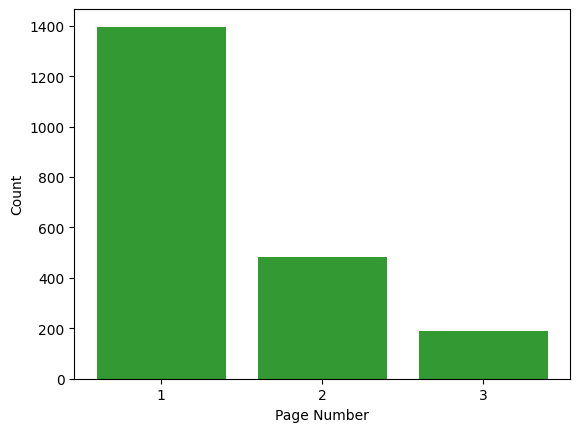

In [58]:
page_numbers = page_number_sum.index
counts = page_number_sum.values
plt.bar(page_numbers, counts, color='green', alpha=0.8)
plt.xlabel('Page Number')
plt.ylabel('Count')
plt.xticks(page_numbers)
plt.show()

In [59]:
# VI) Creating Validation Error DataFrame
# Creating a dataframe of validation errors to see which section (field_name) users usually encounter errors in

error_df = df[df['action'] == 'validation_error']
display(error_df)

,Unnamed: 0,action,device_id,created_at,field_name,field_value,page_number,is_form_edit,is_successful
997449,997449,validation_error,b46GG_k8SK-8Al8fkJhW0w,1561449844437,description,NaN,NaN,NaN,NaN
997450,997450,validation_error,wuyCy8DMS1GlNAZKVjR1Yw,1561449912547,location,{},NaN,NaN,NaN
997451,997451,validation_error,wuyCy8DMS1GlNAZKVjR1Yw,1561449914316,location,{},NaN,NaN,NaN
997452,997452,validation_error,wuyCy8DMS1GlNAZKVjR1Yw,1561449915664,location,{},NaN,NaN,NaN
997453,997453,validation_error,wuyCy8DMS1GlNAZKVjR1Yw,1561449916184,location,{},NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1074801,1074801,validation_error,-2U7xS9kTsKSzXRmu56A4g,1561423228941,title,NaN,NaN,NaN,NaN
1074802,1074802,validation_error,-2U7xS9kTsKSzXRmu56A4g,1561423228955,description,NaN,NaN,NaN,NaN
1074803,1074803,validation_error,gajH5XGBTCe5e7s7Q9c06A,1561421067461,title,۱۷۰۰متر باغ در بهترین منطقه شهریار باغستان نزد...,NaN,NaN,NaN
1074804,1074804,validation_error,gajH5XGBTCe5e7s7Q9c06A,1561421069265,title,۱۷۰۰متر باغ در بهترین منطقه شهریار باغستان نزد...,NaN,NaN,NaN


In [60]:
fields = error_df.field_name.unique()

In [61]:
fields_sum = error_df.groupby('field_name')['field_name'].count()

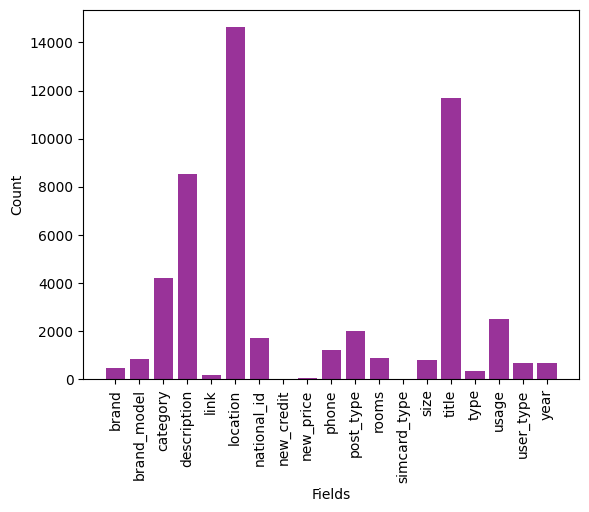

In [62]:
fields = fields_sum.index
counts = fields_sum.values
plt.bar(fields, counts, color='purple', alpha=0.8)
plt.xlabel('Fields')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.xticks(fields)
plt.show()

In [65]:
# VII) Conversion Rate

submission_actions = ['enter_submit', 'submit_next_page', 'submit_prev_page', 'exit_submit']
sub_df = df[df['action'].isin(submission_actions)]

In [67]:
total_submissions = len(sub_df)
successful_submissions = len(sub_df[sub_df['is_successful'] == True])
conversion_rate = (successful_submissions / total_submissions) * 100
conversion_rate

13.745882267881914

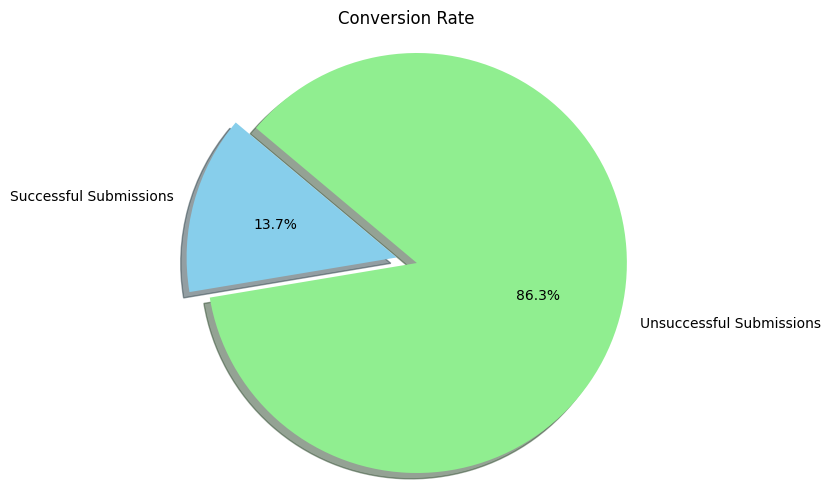

In [73]:
labels = ['Successful Submissions', 'Unsuccessful Submissions']
sizes = [conversion_rate, 100 - conversion_rate]
colors = ['skyblue', 'lightgreen']
explode = (0.1, 0)

plt.figure(figsize=(6, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Conversion Rate')

plt.show()
